## Moving average filter

The moving average(MA) filter is a Low Pass FIR used for smoothing signals. This filter sum the data of L consecutive elements of the input vector and divide by L, therefore the result is a single output point. 
As the parameter L increases, the smoothness of the output is better, whereas the sharp transitions in the data are made increasingly blunt. This implies that this filter has an excellent time-domain response but a poor frequency response.


### Implementation

\begin{align}
y[n]=\frac{1}{L}\sum_{k=0}^{L-1} x[n-k]
\end{align}

Where,

y: output vector<br>
x: input vector<br>
L: data point

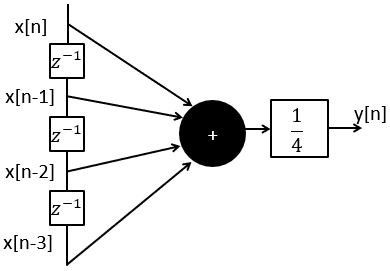
 <center>
Figure 1: Discrete-time 4-point Moving Average FIR filter
</center>


## Modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, dimpulse, dstep
from math import sin, cos, sqrt, pi,pow

## Parameters

In [2]:
fsampling = 100
L = 4

## Coefficients

In [3]:
#coefficients
b = np.ones(L) #numerator coeffs of filter transfer function
#[1. 1. 1. 1.]
#b = (np.ones(L))/L #numerator coeffs of filter transfer function

a = np.array([L] + [0]*(L-1)) #denominator coeffs of filter transfer function
#[4 0 0 0]
#a = np.ones(1)  #denominator coeffs of filter transfer function

## Frequency response


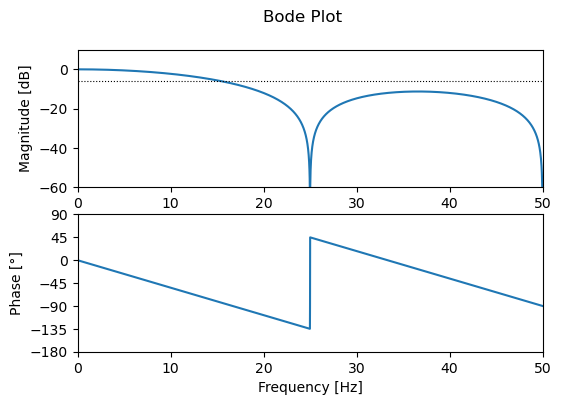

Figure 2: Magnitude and phase response of L=4-point Moving Average filter


In [12]:
#frequency response
w, h = freqz(b, a, worN=4096)
#w, h = freqz(b, a)

w *= fsampling / (2 * pi)         

# Plot the amplitude response
plt.figure(dpi=100)
plt.subplot(2, 1, 1)
plt.suptitle('Bode Plot')
plt.plot(w, 20 * np.log10(abs(h)))       
plt.ylabel('Magnitude [dB]')
plt.xlim(0, fsampling / 2)
plt.ylim(-60, 10)
plt.axhline(-6.01, linewidth=0.8, color='black', linestyle=':')

# Plot the phase response
plt.subplot(2, 1, 2)
plt.plot(w, 180 * np.angle(h) / pi)      
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [°]')
plt.xlim(0, fsampling / 2)
plt.ylim(-180, 90)
plt.yticks([-180, -135, -90, -45, 0, 45, 90])
plt.show()
print("Figure 2: Magnitude and phase response of L=4-point Moving Average filter")

## Impulse response

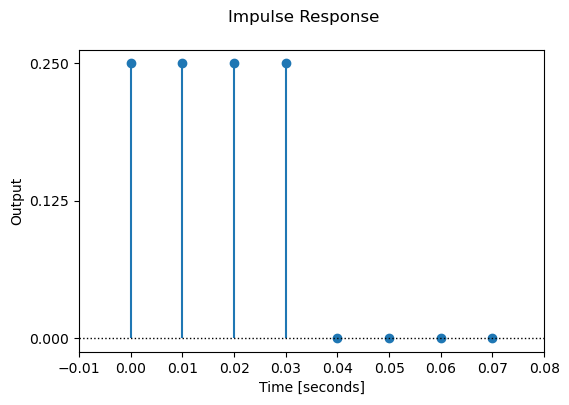

Figure 3: Plot the impulse response of discrete-time system.


In [5]:
t, y = dimpulse((b, a, 1/fsampling), n=2*L)
plt.figure(dpi=100)
plt.suptitle('Impulse Response')
_, _, baseline = plt.stem(t, y[0], basefmt='k:')
plt.setp(baseline, 'linewidth', 1)
baseline.set_xdata([0,1])
baseline.set_transform(plt.gca().get_yaxis_transform())
plt.xlabel('Time [seconds]')
plt.ylabel('Output')
plt.xlim(-1/fsampling, 2*L/fsampling)
plt.yticks([0, 0.5/L, 1.0/L])
plt.show()
print("Figure 3: Plot the impulse response of discrete-time system.")

### Testing our equation

\begin{align}
|H(e^{j\omega})|=\sqrt{\frac{1}{16}((1+cos(\omega)+cos(2\omega)+cos(3\omega))^{2}+(sin(\omega)+sin(2\omega)+sin(3\omega))^{2})}
\end{align}



In [16]:
N=4096 #Elements for w vector
w=(np.linspace(0, pi, N, endpoint=True)).reshape(N, )

H=np.zeros((N,1))
for i in range(N-2):
    H[i]=sqrt(pow(1/L,2)*(pow(1+cos(w[i])+cos(2*w[i])+cos(3*w[i]),2)+ pow(sin(w[i])+sin(2*w[i])+sin(3*w[i]),2)))


#### Comparison of results


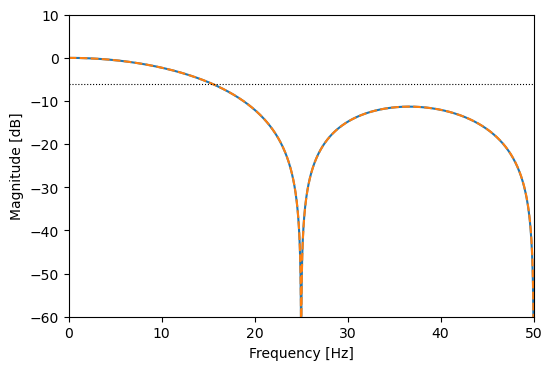

In [22]:
plt.figure(dpi=100)
plt.plot(w*fsampling / (2 * pi),20*np.log10(H+0.000000001))
plt.plot(w*fsampling / (2 * pi), 20*np.log10(abs(h)),linestyle='dashed')       

plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [Hz]')

plt.xlim(0, fsampling / 2)
plt.ylim(-60, 10)
plt.axhline(-6.01, linewidth=0.8, color='black', linestyle=':')
plt.show()
print("Figure 4: Comparison of freqz vs our equation")

## Resources

SciPy Documentation: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html"><code>scipy.signal.freqz</code></a><br>
